In [ ]:
# install packages
!conda install --yes --prefix /opt/conda numpy
!conda install --yes --prefix /opt/conda matplotlib
!conda install --yes --prefix /opt/conda netcdf4

In [ ]:
import netCDF4 as nc4
from netCDF4 import Dataset
import numpy as np

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.basemap import Basemap

In [21]:
import os
os.chdir('./sentinel-5/time_series/London')
os.getcwd()

'/sentinel-5/home/ubuntu/sentinel-5/time_series/London'

In [22]:
from subprocess import Popen, PIPE, STDOUT

# define the area of interest *exact* coordinates
# Jeffery = -96.119041, 39.288518
# London = -0.122683, 51.492775

place_lon, place_lat = -0.122683, 51.492775;
# The distance (degrees) to plot around the place of interest
RANGE = 1.2

# download S5P data
base = "bash ../../dhusget.sh -d s5phub.copernicus.eu/dhus/ -u s5pguest -p s5pguest -m Sentinel-5"
# lon1,lat1:lon2,lat2. coordinates of two opposite vertices of the rectangular area of interest. (first pair for right bottom corner, second for upper left corner)
coordinates = '-c '+ str(round(place_lon-RANGE,3)) + ',' + str(round(place_lat-RANGE,3)) + ':' + str(round(place_lon+RANGE,3)) + ',' + str(round(place_lat+RANGE,3))
# product to download (i.e. NO2/CO/O3, etc.)
product = '-T L2__NO2___'
download = '-o product'
# download data from ..to ..
time = '-S 2018-08-01T00:00:00.000Z -E 2018-08-02T23:59:59.999Z'
# build the full command
cmd = ' '.join([base,coordinates,product,download,time])
print(cmd)
# cmd = 'bash ../../dhusget.sh -d s5phub.copernicus.eu/dhus/ -u s5pguest -p s5pguest -m Sentinel-5 -c -94.000,40.000:-74.000,50.000 -q FilesToDownload.xml -T L2__NO2___ -o product -S 2018-08-01T00:00:00.000Z -E 2018-08-03T23:59:59.999Z'
p = Popen(cmd, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)
output = p.stdout.read()
print(output)

bash ../../dhusget.sh -d s5phub.copernicus.eu/dhus/ -u s5pguest -p s5pguest -m Sentinel-5 -c -1.323,50.293:1.077,52.693 -T L2__NO2___ -o product -S 2018-08-01T00:00:00.000Z -E 2018-08-02T23:59:59.999Z
b'\n================================================================================================================\n\ndhusget version: 0.3.7\n\nUSAGE: dhusget.sh [LOGIN OPTIONS]... [SEARCH QUERY OPTIONS]... [SEARCH RESULT OPTIONS]... [DOWNLOAD OPTIONS]... \n\nType \'dhusget.sh -help\' for usage information\n\n================================================================================================================\nLOGIN\n\nSpecified Data Hub Service URL is:\ns5phub.copernicus.eu/dhus/\n\n================================================================================================================\n\nSEARCH QUERY OPTIONS\n\n\'-m option\' mission is set to Sentinel-5. \n\n\'-i option\' not specified. Search is performed on all available instruments.\n\n Ingestion date options not

In [147]:
import glob

# CHECK the variable !!!
# region = "Europe"
# region = "Jeffrey"
# region = "Paris"
# region = "UK"
# region = "test"
# region = "London"
# region = "Clauscentrale"

# pattern = ""
# get all the files by pattern
# l = glob.glob("./sentinel-5/time_series/" + region + "/*.nc")
l = glob.glob("./PRODUCT" + "/*.nc")
print(l)

['./PRODUCT/S5P_OFFL_L2__NO2____20180802T175313_20180802T193442_04162_01_010100_20180808T214252.nc', './PRODUCT/S5P_OFFL_L2__NO2____20180803T223836_20180804T002005_04179_01_010100_20180810T000713.nc', './PRODUCT/S5P_OFFL_L2__NO2____20180802T005817_20180802T023946_04152_01_010100_20180808T120248.nc', './PRODUCT/S5P_OFFL_L2__NO2____20180802T042116_20180802T060245_04154_01_010100_20180808T115418.nc', './PRODUCT/S5P_OFFL_L2__NO2____20180802T110714_20180802T124844_04158_01_010100_20180808T130759.nc', './PRODUCT/S5P_OFFL_L2__NO2____20180803T090639_20180803T104809_04171_01_010100_20180809T104015.nc', './PRODUCT/S5P_OFFL_L2__NO2____20180802T161143_20180802T175313_04161_01_010100_20180808T214038.nc', './PRODUCT/S5P_OFFL_L2__NO2____20180803T205706_20180803T223836_04178_01_010100_20180809T222315.nc', './PRODUCT/S5P_OFFL_L2__NO2____20180802T060245_20180802T074415_04155_01_010100_20180808T121718.nc', './PRODUCT/S5P_OFFL_L2__NO2____20180803T191537_20180803T205706_04177_01_010100_20180809T205326.nc',

In [148]:
#var = 'CO'
# var = 'NO2'

if 'CO' in l[1]:
    column = 'carbonmonoxide_total_column'
elif 'NO2' in l[1]:
    column = 'nitrogendioxide_tropospheric_column'
    
# if var == "CO":
#     column = 'carbonmonoxide_total_column'
# if var == "NO2":
#     column = 'nitrogendioxide_tropospheric_column_precision'

In [149]:
def scale_range (input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

def normalize (input):
    normalized = input / np.sqrt((np.sum(input**2)))
    return normalized

/opt/conda/lib/python3.6/site-packages/numpy/ma/core.py:6592: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)



20180802T175313


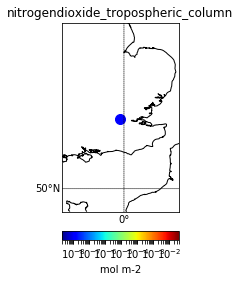

20180803T223836


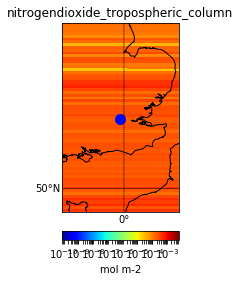

20180802T005817


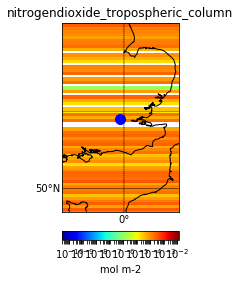

/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3379: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


KeyboardInterrupt: 

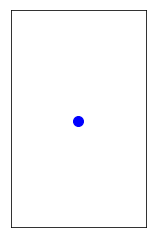

In [150]:
# The distance (degrees) to plot around the place of interest
# RANGE = 0.8

for f in l:
    found = None
    
    fh = Dataset(f, mode='r')
    
    lons = fh.groups['PRODUCT'].variables['longitude'][:][0,:,:]
    lats = fh.groups['PRODUCT'].variables['latitude'][:][0,:,:]
    no2b = fh.groups['PRODUCT'].variables[column][0,:,:]
    no2 = normalize(no2b)
    
    no2_units = fh.groups['PRODUCT'].variables[column].units
    
    lon_0 = lons.mean()
    lat_0 = lats.mean()
    
    
#     if region == 'Europe':
#         #point og Neurath
#         place_lon = 6.6285; place_lat = 51.0366;
#         #plt.annotate('neurath', m(place_lon, place_lat), fontsize=10,horizontalalignment='center'); 
#     elif region == 'Clauscentrale':
#         place_lon = 5.908112; place_lat = 51.154961;
#         #plt.annotate('neurath', m(place_lon, place_lat), fontsize=10,horizontalalignment='center'); 
#     elif region == 'London':
#         place_lon = -0.122683; place_lat = 51.492775;        
#         #plt.annotate('London', m(place_lon, place_lat), fontsize=10,horizontalalignment='center'); 
#     elif region == 'South_Argentina':
#         place_lon = -47.912084; place_lat = -69.093899;        
#         #plt.annotate('London', m(place_lon, place_lat), fontsize=10,horizontalalignment='center');         
#     elif region == 'Jeffrey':
#         place_lon = -96.119041; place_lat = 39.288518;         
#         #plt.annotate('Jeffrey', m(place_lon, place_lat), fontsize=10,horizontalalignment='center'); 
#     elif region == 'Paris':
#         place_lon = 2.347742; place_lat = 48.855428;        
#         #plt.annotate('Paris', m(place_lon, place_lat), fontsize=10,horizontalalignment='center');
#     elif region == 'UK' or region == 'test':
#         place_lon = -0.1278; place_lat = 51.5074;  
#         #plt.annotate('London', m(place_lon, place_lat), fontsize=10,horizontalalignment='center'); 
#     else:
#         print("Invalid region")
    
    lon_bottom = place_lon - RANGE;
    lon_up = place_lon + RANGE;
    lat_bottom = place_lat - RANGE;
    lat_up = place_lat + RANGE;
    
    m = Basemap(width=5000000,height=3500000,
        resolution='h',projection='merc',\
        llcrnrlon=lon_bottom,llcrnrlat=lat_bottom,urcrnrlon=lon_up,urcrnrlat=lat_up)
    
    # add exact location and annotation
#     plt.annotate(region, m(place_lon, place_lat), fontsize=10,horizontalalignment='center');
    x,y = m(place_lon, place_lat)
    m.plot(x, y, 'bo', markersize=10)
    
#     m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
#             llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='h')
    
    xi, yi = m(lons, lats)
    
    # Plot Data
    cs = m.pcolor(xi,yi,np.squeeze(no2),norm=LogNorm(), cmap='jet')
    
    # Add Grid Lines
    m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)
    
    # Add Coastlines, States, and Country Boundaries
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    
    
    # Add Colorbar
    cbar = m.colorbar(cs, location='bottom', pad="10%")
    cbar.set_label(no2_units)

    # Add Title
    plt.title(column)

    import re
    # get the date from the file name
    date_time = re.search('____(.+?)_', str(f))
    if date_time:
        found = date_time.group(1)
        
    print('\n' + found)
    plt.savefig('./' +column + "_" + str(found) +'.png')
    plt.show()